# 0.) Import and Clean data

In [83]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [84]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("W9_Country-data.csv", sep = ",")

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [86]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [87]:
df_var = df['country']
df.drop(['country'], axis = 1, inplace = True)

In [88]:
df_var

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [89]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)


# 1.) Fit a kmeans Model with any Number of Clusters

/var/folders/l_/pnhpmj9j5bv0nkj97f4pfm3m0000gn/T/ipykernel_66498/1979676665.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['gdpp'][y_kmeans == label], df['income'][y_kmeans == label], s=50, cmap='viridis')


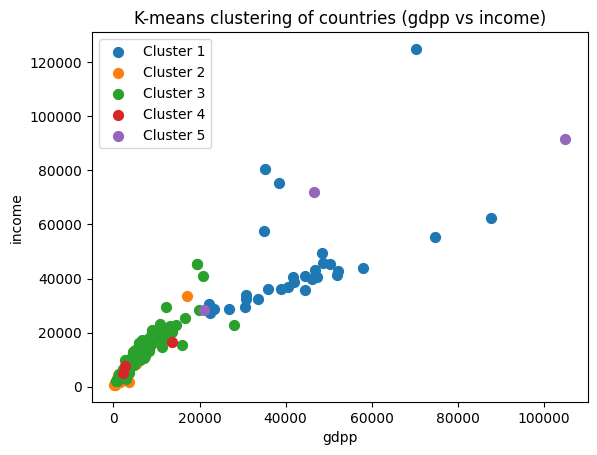

In [90]:
random_kmeans  =  KMeans(n_clusters=5)
random_kmeans.fit(data_scaled)
y_kmeans = random_kmeans.predict(data_scaled)

# Get the unique labels
unique_labels = np.unique(y_kmeans)

# Plot the clusters
for label in unique_labels:
    plt.scatter(df['gdpp'][y_kmeans == label], df['income'][y_kmeans == label], s=50, cmap='viridis')

plt.title('K-means clustering of countries (gdpp vs income)')
plt.xlabel('gdpp')
plt.ylabel('income')

# Create a legend for the clusters
legend_labels = ['Cluster {}'.format(label+1) for label in unique_labels]
plt.legend(legend_labels)

plt.show()


# 2.) Pick two features to visualize across

In [91]:
df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

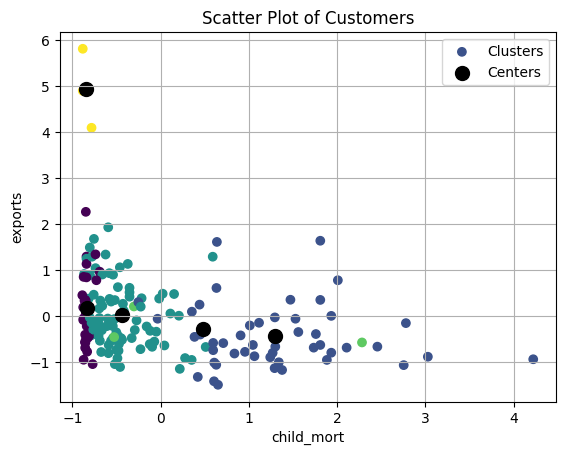

In [92]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 1
X_scaled = data_scaled
X = df

scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], 
                      c=random_kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(random_kmeans.cluster_centers_[:, x1_index], 
                      random_kmeans.cluster_centers_[:, x2_index],
                        marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()


# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


Text(0.5, 0, 'Number of clusters')

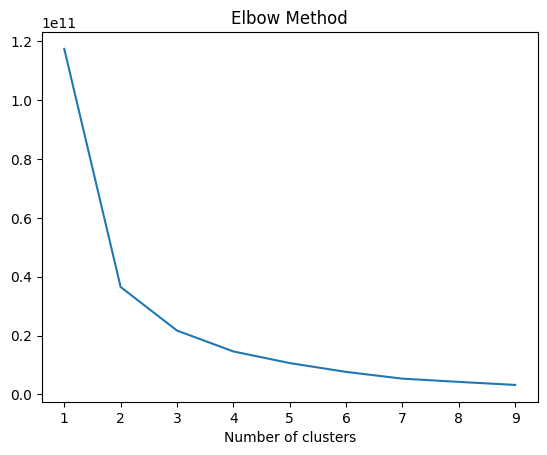

In [93]:
WCSS = []
max_k = 10
for i in range(1,max_k):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    n_init=10, max_iter=300, )
    kmeans.fit(df)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1,max_k), WCSS)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

The chosen number of clusters is 3, which is the value of the elbow point.
The number of clusters, 3, was chosen based on the elbow method. The elbow method is a technique used to determine the optimal number of clusters in a dataset. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and identifying the "elbow" point where the rate of decrease in WCSS slows down significantly.

In [94]:
df.shape

(167, 9)

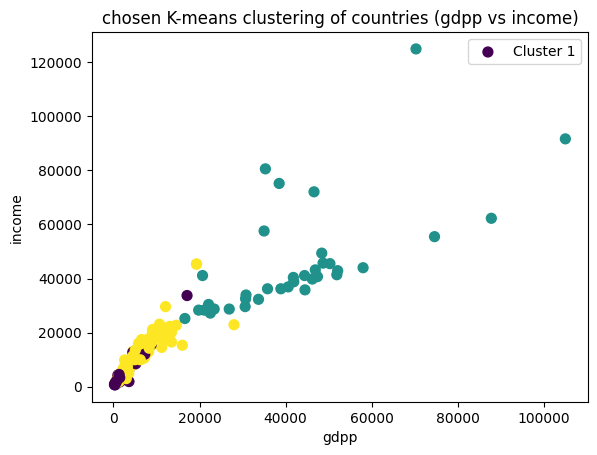

In [95]:
chosen_cluster = 3
chosen_kmeans =  KMeans(n_clusters = chosen_cluster)
chosen_kmeans.fit(data_scaled)
y_kmeans = chosen_kmeans.predict(data_scaled)

plt.size = (10, 10)
plt.scatter(df['gdpp'], df['income'], 
            c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('gdpp')
plt.ylabel('income')
#name the three legend Cluster1 Cluster2 Cluster3
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('chosen K-means clustering of countries (gdpp vs income)')
plt.show()




# 6.) Do the same for a silhoutte plot

silhouette score for the chosen kmeans: 0.28329575683463126


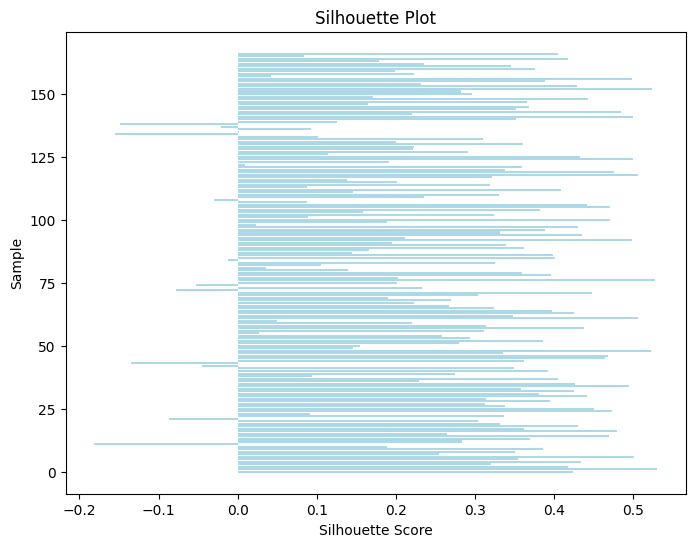

In [96]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

print("silhouette score for the chosen kmeans:", silhouette_score(data_scaled, chosen_kmeans.labels_))
# Calculate the silhouette scores for each sample
silhouette_scores = silhouette_samples(data_scaled, chosen_kmeans.labels_)

# Create a horizontal bar plot of the silhouette scores
plt.figure(figsize=(8, 6))
plt.barh(range(len(data_scaled)), silhouette_scores, color='lightblue')
plt.xlabel('Silhouette Score')
plt.ylabel('Sample')
plt.title('Silhouette Plot')
plt.show()



# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

The countries in cluster 0 are developing or East European countries, ones in cluster 1 are developed countries, and ones in cluster 2 are third-world countries.

In [97]:
chosen_kmeans = KMeans(n_clusters=chosen_cluster,n_init=30)
chosen_kmeans.fit(data_scaled)
pred  = pd.DataFrame(chosen_kmeans.labels_)
pred.columns = ['Cluster']
print("Final result of clustering:\n\n\n")
print("dataset cnoncatenated with cluster number:")
print(pd.concat([df, pred], axis = 1))
print("List of countries in each cluster:")
for i in range(0,chosen_cluster):
    print("Cluster ", i, ":\n ",df_var[kmeans.labels_ == i].values)
    print("\n\n")

Final result of clustering:



dataset cnoncatenated with cluster number:
     child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fe

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [98]:
import pandas as pd
print("Descriptive statistics of the dataset:")
df.describe()
print("derscriptive statistics of the dataset by cluster:")
for i in range(0,chosen_cluster):
    #non scaled values so country_data instead of country_data_scaled
    print("Cluster ", i, ":\n ",df[kmeans.labels_ == i].describe().mean())
    print("\n\n")


    

Descriptive statistics of the dataset:
derscriptive statistics of the dataset by cluster:
Cluster  0 :
  child_mort      76.695381
exports         34.232112
health          13.357679
imports         45.774350
income        2580.117900
inflation       27.010295
life_expec      53.799848
total_fer       11.576683
gdpp          1237.626377
dtype: float64



Cluster  1 :
  child_mort        5.361226
exports          40.231860
health           10.796529
imports          36.160281
income        31807.244469
inflation         2.996373
life_expec       62.540783
total_fer         3.273921
gdpp          36041.638446
dtype: float64



Cluster  2 :
  child_mort       19.442170
exports          42.386292
health            8.291160
imports          43.844304
income        15448.342838
inflation        12.852274
life_expec       59.021684
total_fer         4.925781
gdpp           8758.852789
dtype: float64





[Text(1, 0, 'cluster0'), Text(2, 0, 'cluster1'), Text(3, 0, 'cluster2')]

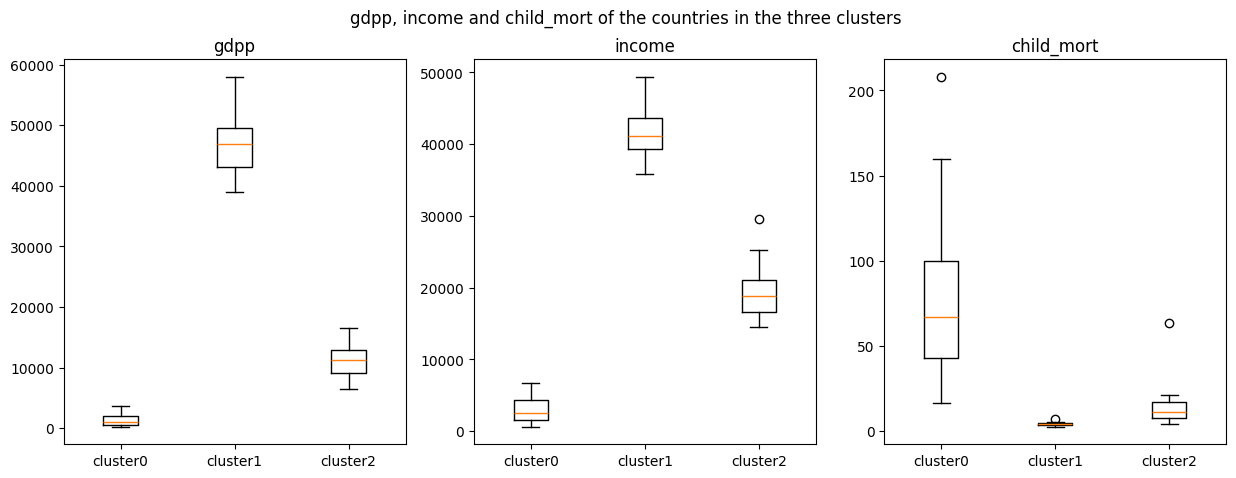

In [99]:
#plot the gdp, income and child mortality of the countries
chosen_variables = ['gdpp', 'income', 'child_mort']
#in the three clusters
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("{0}, {1} and {2} of the countries in the three clusters".format(chosen_variables[0], chosen_variables[1], chosen_variables[2]))
#fig.suptitle('GDP, income and child mortality of the countries in the three clusters')
#plot gdp
axs[0].boxplot([df[chosen_variables[0]][kmeans.labels_ == 0], df['gdpp'][kmeans.labels_ == 1], df['gdpp'][kmeans.labels_ == 2]])
axs[0].set_title(chosen_variables[0])
axs[0].set_xticklabels(['cluster'+str(i) for i in range(0,chosen_cluster)])

#plot inflation
axs[1].boxplot([df[chosen_variables[1]][kmeans.labels_ == 0], df['income'][kmeans.labels_ == 1], df['income'][kmeans.labels_ == 2]])
axs[1].set_title(chosen_variables[1])
axs[1].set_xticklabels(['cluster'+str(i) for i in range(0,chosen_cluster)])

#plot child mortality
axs[2].boxplot([df[chosen_variables[2]][kmeans.labels_ == 0], df['child_mort'][kmeans.labels_ == 1], df['child_mort'][kmeans.labels_ == 2]])
axs[2].set_title(chosen_variables[2])
axs[2].set_xticklabels(['cluster'+str(i) for i in range(0,chosen_cluster)])




# 9.) Write an observation about the descriptive statistics.

Cluster 1 has the highest gdpp and income and the lowest child mortality. Cluster 2 has the lowest gdpp and income and the highest child mortality. Cluster 0 is in between the two clusters.
